<h1>Genetic algorithm for solving Ttavelling Salesman Problem</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm

Reading the test case fine which contains locations of cities.

In [2]:
with open('./testcases/lu980.tsp') as f:
    lines = f.readlines()[7:-1]

n = len(lines)
coordinates = np.zeros((n ,2))

for index, line in enumerate(lines):

    coordinates[index] = line.split()[1], line.split()[2]

Getting a distance matrix from coordinates of cities.

In [3]:
def get_distance_matrix(coordinates):
    n = len(coordinates)
    
    dist = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            dist[i, j] = np.sqrt(((coordinates[i] - coordinates[j])**2).sum())
    return dist

In [4]:
dist = get_distance_matrix(coordinates)

Generating a random initial population. Each chromosome here is a permutation.

In [5]:
def random_population(pop_size, n):
    
    initial_pop = np.zeros((pop_size, n))
    
    for i in range(pop_size):
        perm = np.random.permutation(n)
        initial_pop[i] = perm
    
    return initial_pop.astype('int32')

Calculating the cost of a permutation.

In [6]:
def path_cost(solution):
    
    n = len(solution)
    
    cost = 0.0
    
    for i in range(n):
                
        cost += dist[solution[i], solution[(i+1)%n]]
        
    return cost

Fitness of a solution. Just negative of its cost because fitness of cost are inversely related.

In [7]:
def fitness(solution):
    return -path_cost(solution)

For crossover, we define a crossover_rate. This indicates the proportion of population subject to corssover. For each new child we take 2 parents. Then we take a random index, fill the first half of child (up to generated index) with the first parents value and then we fill the rest of child with unseen values from second parent.

In [8]:
def crossover(population, crossover_rate):
    
    
    n = len(population[0])
    m = len(population)
    crossover_n = int(m * crossover_rate)
    
    indices = np.random.randint(low=0, high=m, size=(crossover_n, 2))
    
    crossover_pop = np.zeros((crossover_n, n)).astype('int32')
    
    for i in range(crossover_n):
        
        l = np.random.randint(0, n)
        
        parent1, parent2 = population[indices[i][0]], population[indices[i][1]]
        
        crossover_pop[i][:l] = parent1[:l]
        
        c = l
        
        for j in range(l, l + n):
            if parent2[j % n] not in crossover_pop[i]:
                crossover_pop[i][c] = parent2[j % n]
                c += 1
        
    return crossover_pop

For mutation, we take a sample of population proportional to mutation_rate, then randomly shuffle whatever is between two randomly generated indices.

In [9]:
def mutation(population, mutation_rate):
    
    n = len(population[0])
    m = len(population)
    mutation_n = int(m * mutation_rate)
    
    indices = np.random.randint(low=0, high=m, size=(mutation_n))
    
    mutation_pop = np.zeros((mutation_n, n)).astype('int32')
    
    for (i, index) in enumerate(indices):
        
        l1, l2 = np.random.randint(0, n, size = 2)
        
        if l1 > l2:
            l1, l2 = l2, l1
        
        mutation_pop[i] = population[index]
        np.random.shuffle(mutation_pop[i][l1:l2])
    
    return mutation_pop

For selection, first we sort the chromosomes according to their fitness. Then we select a number of best chromosomes (from top of the list) proportional to select_elites parameter. And we randomly select some chromosomes from the remaining ones to keep the population diverse.

In [10]:
def selection(population, pop_size, select_elites):
        
    sorted_pop = np.array(sorted(population, key=fitness, reverse=True))
        
    n = len(population)
    
    c1 = int(select_elites * pop_size)
    c2 = pop_size - c1
        
    idx = np.random.choice(n - c1, size=c2, replace=False)
    idx += c1 
        
    selected_pop = sorted_pop[:c1]
    selected_pop = np.append(selected_pop, np.take(sorted_pop, idx, axis = 0), 0)
    
    return selected_pop

Implementation of genetic algorithm. Just combines the functions that are defined.

In [11]:
def genetic_algortithm(dist):
    
    n = dist.shape[0]

    fitnesses = []
    
    init_pop = random_population(pop_size, n)
    current_pop = init_pop

    for i in tqdm(range(n_epochs)):
                
        crossover_pop = crossover(current_pop, crossover_rate)
        current_pop = np.concatenate((current_pop, crossover_pop), axis = 0)
        
        mutation_pop = mutation(current_pop, mutation_rate)
        current_pop = np.concatenate((current_pop, mutation_pop))
        
        
        current_pop = selection(current_pop, pop_size, select_elites)
        
        elite = current_pop[0]
        
        fitnesses.append(fitness(elite))
    
    return elite, fitnesses

Testing it on a testcase.

  0%|          | 0/2000 [00:00<?, ?it/s]

best solution found is [889 656  96  22 302 813  85 451 658 282 351 318 672 333 810 498 852 412
 933 448 367 830  78 833 417   1 342 971 964 750 125 690 790  27 331 290
 210 153 973 831 731 514 782 150  83 275 525  77  98 856 976 357  40 863
 320 244 703 582 861 885 148   2   6 241 313 760 552 629 639 764 762 505
 691 779 179 462 531 334 972 395 155 845 186 907 800 761 299 818 325 300
 471 132 686 400 977 769 379 430 452 256 908 416 499 349 447 805  36 952
 571 181 262 958 467 723 353 411 360 661 660  74 590 969 206 122 104 642
 676 401 485 724 428 583 613 682 838 814 792 851  51 699 520 156 424 267
 269 909 188 940 174 296  41 377 166 923 793 475 776 700  47 388 200 143
 373 154  99 579 834 307 224  26 251 230 260 482  84 457 547 848 679 207
  50  81 637 533 324 437 193 574 216 445  25 195 383 567 651 949 593 344
 732 137 550 719 403 853 203 387 472 389 227 577  62  64 278 862 620 523
 825 189 270 421 618 361 705 240 849 609 829  97 965  68 294 901 194 772
 636 702 506 440 946 753 912

Text(0.5, 1.0, 'Fitness of best solution found over epochs')

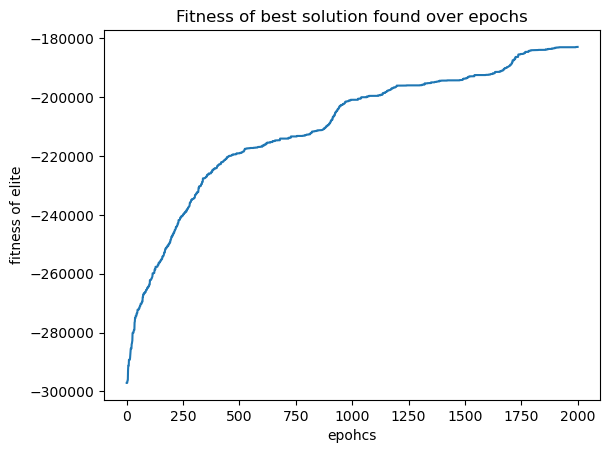

In [12]:
pop_size = 150
n_epochs = 2000
crossover_rate = 0.6
mutation_rate = 0.1
select_elites = 0.8
    

elite, fitnesses = genetic_algortithm(dist)

print(f"best solution found is {elite}\n and its fitness is {fitnesses[-1]:.0f}")

plt.plot(fitnesses)
plt.xlabel("epohcs")
plt.ylabel("fitness of elite")
plt.title("Fitness of best solution found over epochs")